In [115]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 회귀

In [116]:
x = np.array([[1], [11], [21], [31], [41]])
y = np.array([100, 67, 43, 21, 0])

model = LinearRegression()

model.fit(x, y)
print(x.shape)
print(y.shape)
y_pred = model.predict(x)

print(y_pred)
print(model.coef_)

(5, 1)
(5,)
[95.4 70.8 46.2 21.6 -3. ]
[-2.46]


# 다중 선형 회귀 및 평가

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [118]:
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
Y = 4 + 3 * X1 + 2 * X2 + np.random.rand(100, 1)

In [119]:
model = LinearRegression()
X = np.hstack((X1, X2))
model.fit(X, Y)
pass

In [120]:
print('회귀 계수 (기울기): ', model.coef_)
print('절편:', model.intercept_[0])
# mse, mae 등 평가
pred = model.predict(X)
print(Y.shape)
print(pred.shape)
mse = mean_squared_error(Y, pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

mae = mean_absolute_error(Y, pred)
print('MAE: ', mae)

회귀 계수 (기울기):  [[2.97650348 1.95384044]]
절편: 4.604978060028826
(100, 1)
(100, 1)
MSE:  0.08942807519612178
RMSE:  0.2990452728202233
MAE:  0.2607195082665134


Random Forest Accuracy: 1.0
Random Forest 분류 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

KNN Accuracy: 1.0
KNN 분류 결과:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Forest AUC: 1.0000
KNN AUC: 1.0000


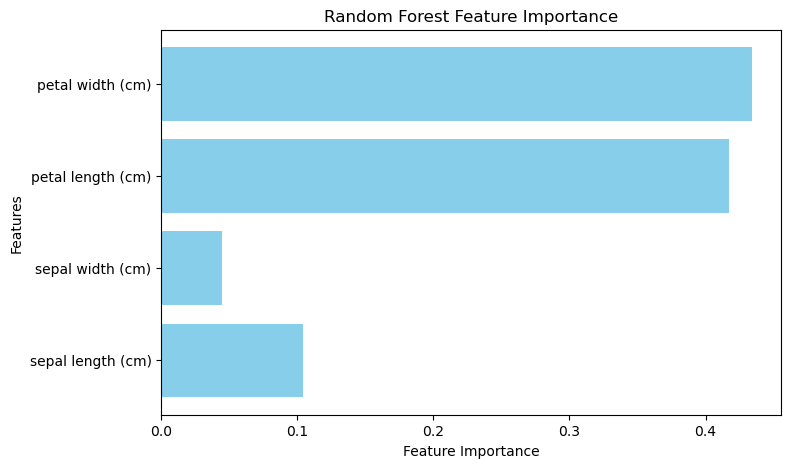

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# 데이터셋 로드
iris = load_iris()
X, Y = iris.data, iris.target

# 학습/테스트 데이터 분할 (70%:30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Random Forest 모델 학습 및 평가
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest 분류 결과:")
print(classification_report(y_test, y_pred))

# KNN 모델 학습 및 평가
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN 분류 결과:")
print(classification_report(y_test, y_pred_knn))

# AUC 평가를 위해 라벨 이진화 (One-vs-Rest)
classes = [0, 1, 2]
y_test_bin = label_binarize(y_test, classes=classes)

# Random Forest의 확률 예측값을 이용해 AUC 계산
y_score_rf = clf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test_bin, y_score_rf, average='macro', multi_class='ovr')
print(f"Random Forest AUC: {auc_rf:.4f}")

# KNN의 확률 예측값을 이용해 AUC 계산
y_score_knn = knn.predict_proba(X_test)
auc_knn = roc_auc_score(y_test_bin, y_score_knn, average='macro', multi_class='ovr')
print(f"KNN AUC: {auc_knn:.4f}")

# Random Forest 특성 중요도 시각화
feature_importance = clf.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(iris.feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()
